Import Necessary libraries

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper                                              
from bidi.algorithm import get_display                                      
from arabic_reshaper import reshape 
import persian_wordcloud  
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import gensim
from gensim import corpora
from sklearn.naive_bayes import MultinomialNB

Read Dataset 

In [2]:
df=pd.read_csv('data/asriran.csv',encoding='utf-8-sig')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339834 entries, 0 to 339833
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   title      339834 non-null  object
 1   shortlink  339834 non-null  object
 2   time       339834 non-null  object
 3   service    339834 non-null  object
 4   subgroup   339834 non-null  object
 5   abstract   155497 non-null  object
 6   body       295560 non-null  object
dtypes: object(7)
memory usage: 18.1+ MB


In [4]:
df.describe()

,title,shortlink,time,service,subgroup,abstract,body
count,339834,339834,339834,339834,339834,155497,295560
unique,334636,339833,319624,2,23,154254,290927
top,صفحه اول روزنامه های امروز (عکس),https://www.asriran.com/0035SR,۱۳:۲۹ - ۱۱ آذر ۱۳۹۵,صفحه نخست,اجتماعی,مهرداد خدیر,عصر ایران
freq,746,2,11,327099,97274,52,772


In [5]:
df.head()

,title,shortlink,time,service,subgroup,abstract,body
0,پلیس: جرائم خشن و مسلحانه در تهران کاهش یافته است,https://www.asriran.com/003YoB,۰۸:۴۱ - ۲۳ تير ۱۴۰۱,صفحه نخست,عمومی,آمارهای پلیس نشان می‌دهد که جرائم خشن و مسلحان...,رئیس پلیس آگاهی تهران بزرگ اعلام کرد که موضوع ...
1,"وزیر بهداشت:\r\nآغاز اجرای طرح جامع ""دارویار""/...",https://www.asriran.com/003YoC,۰۸:۴۷ - ۲۳ تير ۱۴۰۱,صفحه نخست,اخبار سلامت,هدف اصلی وزارت بهداشت از این طرح این است که پو...,"وزیر بهداشت جزییات طرح ""دارویار"" که اجرای آن آ..."
2,وزارت بهداشت: قیمت دارو برای مصرف کننده ثابت م...,https://www.asriran.com/003YoF,۰۹:۰۸ - ۲۳ تير ۱۴۰۱,صفحه نخست,اجتماعی,NaN,سخنگوی وزارت بهداشت، درمان و آموزش پزشکی در تو...
3,معاون رئیسی: مردم به زودی شاهد اثرات مثبت اقدا...,https://www.asriran.com/003YZP,۱۶:۴۶ - ۱۶ تير ۱۴۰۱,صفحه نخست,سیاسی,معاون امور مجلس رئیس جمهور: استان گیلان دارای ...,معاون رئیس جمهور گفت: دولت برنامه های راهبردی ...
4,دستگیری سارق ۲۰ هزار دلاری ارز دیجیتال در گلستان,https://www.asriran.com/003YZN,۱۶:۴۱ - ۱۶ تير ۱۴۰۱,صفحه نخست,اجتماعی,شهروندان توصیه‌های پلیس فتا را جدی بگیرند و در...,رییس پلیس فتا فرماندهی انتظامی گلستان گفت: سار...


EDA

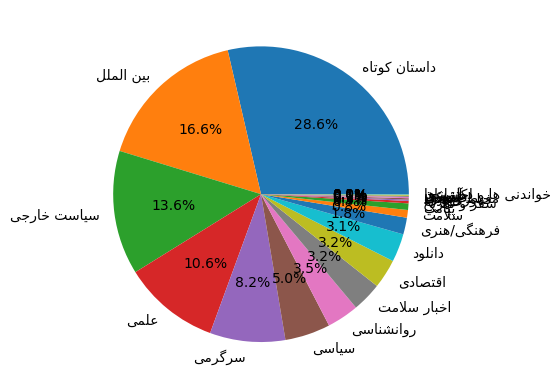

In [8]:
labels = list(set(df.subgroup.tolist()))
persian_labels = [get_display(reshape(l)) for l in labels]                  
sizes = df.subgroup.value_counts()                                                                                             
plt.pie(sizes, labels=persian_labels, autopct='%1.1f%%')    
plt.show()

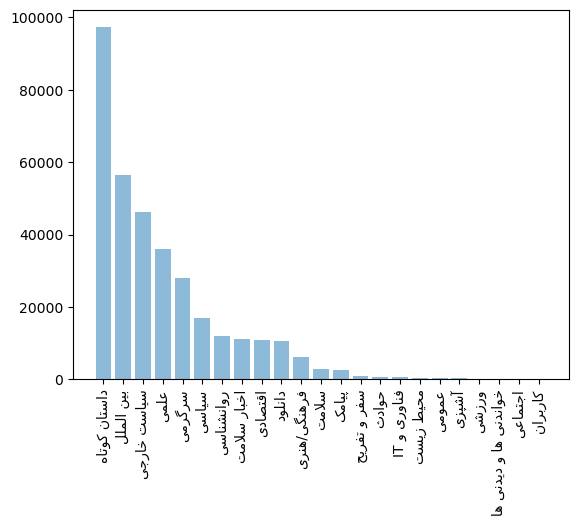

In [21]:
plt.bar(persian_labels,df.subgroup.value_counts(), align='center', alpha=0.5)
plt.xticks(rotation=90)
plt.show()

Statistical Methods and Machine learning

Bag of Words and Ngram with KNN

In [32]:
count_vect = CountVectorizer(ngram_range=(1,5))

# Transform the training data
train_bow = count_vect.fit_transform(df['title'].values)

# Get the feature names
feature_names_bow = count_vect.get_feature_names_out()

In [41]:
knn = KNeighborsClassifier(n_neighbors=len(set(df.subgroup.tolist())))

# Fit the model on the training data
knn.fit(train_bow, df.subgroup.to_list())

text = 'سناتور جمهوری‌خواه؛ آزادسازی پول به ازای آزادی زندانیان دوتابعیتی "بدعتی خطرناک" است'

# Transform the test data using the same feature set
test_bow = count_vect.transform([text])

# Predict the label for the test data
predict = knn.predict(test_bow)
predict[0]

'اجتماعی'

In [54]:
knn = KNeighborsClassifier(n_neighbors=len(set(df.subgroup.tolist())))

# Fit the model on the training data
knn.fit(train_bow, df.subgroup.to_list())

text = 'مسابقه شهراورد بین استقلال و پرسپولیس با نتیجه 1-0 تموم شد'

# Transform the test data using the same feature set
test_bow = count_vect.transform([text])

# Predict the label for the test data
predict = knn.predict(test_bow)
predict[0]

'داستان کوتاه'

In [58]:
knn = KNeighborsClassifier(n_neighbors=len(set(df.subgroup.tolist())))

# Fit the model on the training data
knn.fit(train_bow, df.subgroup.to_list())

text = 'بیماری های قلبی ریوی با گسترش آلودگی هوا زیاد شده است'

# Transform the test data using the same feature set
test_bow = count_vect.transform([text])

# Predict the label for the test data
predict = knn.predict(test_bow)
predict[0]

'اجتماعی'

In [60]:
knn = KNeighborsClassifier(n_neighbors=len(set(df.subgroup.tolist())))

# Fit the model on the training data
knn.fit(train_bow, df.subgroup.to_list())

text = 'خبرگزاری تسنیم وابسته به سپاه پاسداران جمهوری اسلامی ایران گزارش داد که طالبان عکاس و تدوین‌گر این خبرگزاری را در میدان هوایی کابل بازداشت کرده است. به گزارش تسنیم، محمدحسین ولایتی ۱۰ روز در کابل حضور داشت و هنگام بازگشت به ایران بازداشت شد'

# Transform the test data using the same feature set
test_bow = count_vect.transform([text])

# Predict the label for the test data
predict = knn.predict(test_bow)
predict[0]


'اجتماعی'

In [67]:
knn = KNeighborsClassifier(n_neighbors=len(set(df.subgroup.tolist())))

# Fit the model on the training data
knn.fit(train_bow, df.subgroup.to_list())

text = 'شرکت «کارگیل»، یک کشتی باری عظیم با دو بادبان نامنعطف ساخته است تا به کاهش مصرف سوخت کشتی‌های باری در بریتانیا کمک می‌کند.'

# Transform the test data using the same feature set
test_bow = count_vect.transform([text])

# Predict the label for the test data
predict = knn.predict(test_bow)
predict[0]

'داستان کوتاه'

TF-IDF WITH KNN

In [36]:
# Create an instance of TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the documents
tfidf_matrix = vectorizer.fit_transform(df['title'].values)

# TF-IDF matrix
feature_names = vectorizer.get_feature_names_out()

# Print the results
# for row in range(tfidf_matrix.shape[0]):
#     print("Document:", row+1)
#     for col in tfidf_matrix[row].nonzero()[1]:
#         print("  Feature:", feature_names[col], " - TF-IDF:", tfidf_matrix[row, col])

In [42]:
nn = KNeighborsClassifier(n_neighbors=len(set(df.subgroup.tolist())))

# Fit the model on the training data
knn.fit(tfidf_matrix, df.subgroup.to_list())

text = 'سناتور جمهوری‌خواه؛ آزادسازی پول به ازای آزادی زندانیان دوتابعیتی "بدعتی خطرناک" است'

# Transform the test data using the same feature set
test_bow = vectorizer.transform([text])

# Predict the label for the test data
predict = knn.predict(test_bow)
predict[0]

'بین الملل'

In [53]:
nn = KNeighborsClassifier(n_neighbors=len(set(df.subgroup.tolist())))

# Fit the model on the training data
knn.fit(tfidf_matrix, df.subgroup.to_list())

text = 'مسابقه شهراورد بین استقلال و پرسپولیس با نتیجه 1-0 تموم شد'

# Transform the test data using the same feature set
test_bow = vectorizer.transform([text])

# Predict the label for the test data
predict = knn.predict(test_bow)
predict[0]

'ورزشی'

In [57]:
nn = KNeighborsClassifier(n_neighbors=len(set(df.subgroup.tolist())))

# Fit the model on the training data
knn.fit(tfidf_matrix, df.subgroup.to_list())

text = 'بیماری های قلبی ریوی با گسترش آلودگی هوا زیاد شده است'

# Transform the test data using the same feature set
test_bow = vectorizer.transform([text])

# Predict the label for the test data
predict = knn.predict(test_bow)
predict[0]

'اجتماعی'

In [61]:
nn = KNeighborsClassifier(n_neighbors=len(set(df.subgroup.tolist())))

# Fit the model on the training data
knn.fit(tfidf_matrix, df.subgroup.to_list())

text = 'خبرگزاری تسنیم وابسته به سپاه پاسداران جمهوری اسلامی ایران گزارش داد که طالبان عکاس و تدوین‌گر این خبرگزاری را در میدان هوایی کابل بازداشت کرده است. به گزارش تسنیم، محمدحسین ولایتی ۱۰ روز در کابل حضور داشت و هنگام بازگشت به ایران بازداشت شد'

# Transform the test data using the same feature set
test_bow = vectorizer.transform([text])

# Predict the label for the test data
predict = knn.predict(test_bow)
predict[0]

'بین الملل'

In [66]:
nn = KNeighborsClassifier(n_neighbors=len(set(df.subgroup.tolist())))

# Fit the model on the training data
knn.fit(tfidf_matrix, df.subgroup.to_list())

text = 'شرکت «کارگیل»، یک کشتی باری عظیم با دو بادبان نامنعطف ساخته است تا به کاهش مصرف سوخت کشتی‌های باری در بریتانیا کمک می‌کند.'

# Transform the test data using the same feature set
test_bow = vectorizer.transform([text])

# Predict the label for the test data
predict = knn.predict(test_bow)
predict[0]

'بین الملل'

LDA (Latent Dirichlet Allocation)

In [39]:
topics={0:'آشپزی',1:'اجتماعی',2:'اخبار سلامت',3:'اقتصادی',4:'بین الملل',5:'حوادث',6:'خواندنی ها و دیدنی ها',7:'داستان کوتاه',8:'دانلود',9:'روانشناسی',10:'سرگرمی',11:'سفر و تفریح',12:'سلامت',13:'سیاست خارجی',14:'سیاسی',15:'علمی',16:'عمومی',17:'فرهنگی/هنری',18:'فناوری و IT',19:'محیط زیست',20:'ورزشی',21:'پیامک',22:'کاربران'}

In [40]:
# Tokenize the documents
tokenized_docs = [doc.split() for doc in df['title'].values.tolist()]

# Create a dictionary from the tokenized documents
dictionary = corpora.Dictionary(tokenized_docs)

# Convert tokenized documents to vectors
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

# Train the LDA model
lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=len(set(df.subgroup.values.tolist())))

# Print the topics and their keywords
for idx, topic in lda_model.print_topics():
    print(f"Topic #{idx}: {topic}")

Topic #7: 0.142*"های" + 0.080*"از" + 0.045*"تا" + 0.035*"افزایش" + 0.030*"هزار" + 0.026*"اول" + 0.025*"کاهش" + 0.024*"میلیون" + 0.023*"در" + 0.022*"قیمت"
Topic #4: 0.057*"از" + 0.055*"درباره" + 0.033*"است" + 0.030*"به" + 0.023*"پرونده" + 0.022*"الله" + 0.021*"آیت‌الله" + 0.019*"شورای" + 0.018*"کردن" + 0.018*"آیت"
Topic #17: 0.042*"با" + 0.027*"در" + 0.027*"وزارت" + 0.027*"وزیر" + 0.026*"اروپا" + 0.026*"برای" + 0.026*"هستند" + 0.025*"دفاع" + 0.024*"(+فیلم)" + 0.022*"و"
Topic #5: 0.089*"در" + 0.031*"آب" + 0.031*"و" + 0.026*"آخرین" + 0.026*"عراق" + 0.023*"بین" + 0.023*"وضعیت" + 0.020*"است" + 0.019*"دستگیری" + 0.019*"نمایشگاه"
Topic #14: 0.103*"در" + 0.071*"و" + 0.028*"فروش" + 0.027*"خودرو" + 0.026*"آغاز" + 0.025*"لغو" + 0.021*"بازار" + 0.021*"استان" + 0.019*"فردا" + 0.016*"زخمی"
Topic #2: 0.228*"را" + 0.096*"کرد" + 0.052*"امروز" + 0.035*"خود" + 0.024*"دست" + 0.023*"به" + 0.020*"داد" + 0.018*"که" + 0.016*"برنامه" + 0.016*"خانه"
Topic #19: 0.053*"از" + 0.051*"چه" + 0.035*"چرا" + 0.028*"بازی

In [48]:
# Get topic distribution for a document
new_doc = 'سناتور جمهوری‌خواه؛ آزادسازی پول به ازای آزادی زندانیان دوتابعیتی "بدعتی خطرناک" است'
new_doc_bow = dictionary.doc2bow(new_doc.split())
print(lda_model.get_document_topics(new_doc_bow))
max_value = max(lda_model.get_document_topics(new_doc_bow), key=lambda x: x[1])
key_of_max_value = max_value[0]

print(topics[key_of_max_value])

[(1, 0.20751636), (6, 0.17408597), (18, 0.47346118)]
فناوری و IT


In [52]:
# Get topic distribution for a document
new_doc = 'مسابقه شهراورد بین استقلال و پرسپولیس با نتیجه 1-0 تموم شد'
new_doc_bow = dictionary.doc2bow(new_doc.split())
print(lda_model.get_document_topics(new_doc_bow))
max_value = max(lda_model.get_document_topics(new_doc_bow), key=lambda x: x[1])
key_of_max_value = max_value[0]

print(topics[key_of_max_value])

[(0, 0.311741), (5, 0.19967918), (8, 0.18012409), (15, 0.21666466)]
آشپزی


In [56]:
# Get topic distribution for a document
new_doc = 'بیماری های قلبی ریوی با گسترش آلودگی هوا زیاد شده است'
new_doc_bow = dictionary.doc2bow(new_doc.split())
print(lda_model.get_document_topics(new_doc_bow))
max_value = max(lda_model.get_document_topics(new_doc_bow), key=lambda x: x[1])
key_of_max_value = max_value[0]

print(topics[key_of_max_value])

[(0, 0.09515898), (2, 0.20153679), (7, 0.09925712), (8, 0.098363295), (13, 0.32913595), (16, 0.109344326)]
سیاست خارجی


In [62]:
# Get topic distribution for a document
new_doc = 'خبرگزاری تسنیم وابسته به سپاه پاسداران جمهوری اسلامی ایران گزارش داد که طالبان عکاس و تدوین‌گر این خبرگزاری را در میدان هوایی کابل بازداشت کرده است. به گزارش تسنیم، محمدحسین ولایتی ۱۰ روز در کابل حضور داشت و هنگام بازگشت به ایران بازداشت شد'
new_doc_bow = dictionary.doc2bow(new_doc.split())
print(lda_model.get_document_topics(new_doc_bow))
max_value = max(lda_model.get_document_topics(new_doc_bow), key=lambda x: x[1])
key_of_max_value = max_value[0]

print(topics[key_of_max_value])

[(0, 0.120881155), (1, 0.06719072), (2, 0.1244024), (3, 0.03622929), (6, 0.053856175), (7, 0.10258916), (8, 0.03116266), (9, 0.04548442), (10, 0.037172146), (11, 0.1725782), (13, 0.16241972), (15, 0.033103935)]
سفر و تفریح


In [65]:
# Get topic distribution for a document
new_doc = 'شرکت «کارگیل»، یک کشتی باری عظیم با دو بادبان نامنعطف ساخته است تا به کاهش مصرف سوخت کشتی‌های باری در بریتانیا کمک می‌کند.'
new_doc_bow = dictionary.doc2bow(new_doc.split())
print(lda_model.get_document_topics(new_doc_bow))
max_value = max(lda_model.get_document_topics(new_doc_bow), key=lambda x: x[1])
key_of_max_value = max_value[0]

print(topics[key_of_max_value])

[(6, 0.3955172), (7, 0.12487309), (10, 0.07481547), (13, 0.1930367), (18, 0.0892997), (20, 0.081389114)]
خواندنی ها و دیدنی ها


Multinomial Naive Bayes

In [49]:
cv = CountVectorizer()
X = cv.fit_transform(df['title'].values)
mnb = MultinomialNB()
mnb.fit(X, df['subgroup'].values)

MultinomialNB()

In [50]:
mnb.predict(cv.transform(['سناتور جمهوری‌خواه؛ آزادسازی پول به ازای آزادی زندانیان دوتابعیتی "بدعتی خطرناک" است']))[0]

'بین الملل'

In [51]:
mnb.predict(cv.transform(['مسابقه شهراورد بین استقلال و پرسپولیس با نتیجه 1-0 تموم شد']))[0]

'ورزشی'

In [55]:
mnb.predict(cv.transform(['بیماری های قلبی ریوی با گسترش آلودگی هوا زیاد شده است']))[0]

'سلامت'

In [63]:
mnb.predict(cv.transform(['خبرگزاری تسنیم وابسته به سپاه پاسداران جمهوری اسلامی ایران گزارش داد که طالبان عکاس و تدوین‌گر این خبرگزاری را در میدان هوایی کابل بازداشت کرده است. به گزارش تسنیم، محمدحسین ولایتی ۱۰ روز در کابل حضور داشت و هنگام بازگشت به ایران بازداشت شد. ']))[0]

'سیاسی'

In [64]:
mnb.predict(cv.transform(['شرکت «کارگیل»، یک کشتی باری عظیم با دو بادبان نامنعطف ساخته است تا به کاهش مصرف سوخت کشتی‌های باری در بریتانیا کمک می‌کند.']))[0]

'بین الملل'

Until now Naive Bayes has better accuracy and performance

Deep learning (Comming soon...)

1-BILSTM

2-BERTopic